In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
pd.options.display.max_columns = None

In [3]:
mainpath='/Users/ALITO/Documents'

In [4]:
data=pd.read_csv(mainpath+'/'+'Set/SUICIDIOS.csv')

In [5]:
data.shape

(168, 3)

In [6]:
data.head()

,año,dia,numero
0,1994,1,22
1,1994,2,9
2,1994,3,21
3,1994,4,12
4,1994,5,15


In [6]:
data.corr()

,año,dia,numero
año,1.000000,0.000000,-0.168901
dia,0.000000,1.000000,0.101032
numero,-0.168901,0.101032,1.000000


In [7]:
sub_data = data[
                [  'año',
                   'dia',
                   'numero',
                ]
               ]

In [8]:
sub_data.describe()

,año,dia,numero
count,168.000000,168.000000,168.000000
mean,2005.500000,4.000000,14.851190
std,6.942881,2.005979,4.904648
min,1994.000000,1.000000,6.000000
25%,1999.750000,2.000000,12.000000
50%,2005.500000,4.000000,15.000000
75%,2011.250000,6.000000,18.000000
max,2017.000000,7.000000,32.000000


In [9]:
data_filtrada = sub_data[
                        (sub_data["año"]>0) &
                        (sub_data["dia"]>0) &
                        (sub_data["numero"]>0)
                        ]

In [10]:
data_filtrada.describe()

,año,dia,numero
count,168.000000,168.000000,168.000000
mean,2005.500000,4.000000,14.851190
std,6.942881,2.005979,4.904648
min,1994.000000,1.000000,6.000000
25%,1999.750000,2.000000,12.000000
50%,2005.500000,4.000000,15.000000
75%,2011.250000,6.000000,18.000000
max,2017.000000,7.000000,32.000000


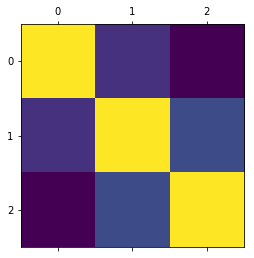

In [11]:
plt.matshow(data_filtrada.corr())

In [12]:
corr_data_filtrada=data_filtrada.corr()
corr_data_filtrada.to_excel(mainpath+"corr_data_filtrada_SUICIDIOS.xls")

In [13]:
colsnames = data_filtrada.columns.values.tolist()

In [14]:
colsnames

['año', 'dia', 'numero']

In [15]:
predictors = colsnames[0:2]

In [16]:
target = colsnames[2]

In [17]:
predictors

['año', 'dia']

In [18]:
target

'numero'

In [19]:
X = data_filtrada[predictors]
Y = data_filtrada[target]

In [20]:
bootstrap=True
criterion='mse'
max_depth=None
max_features='auto'
max_leaf_nodes=None
min_impurity_decrease=0.0
min_impurity_split=None
min_samples_leaf=1
min_samples_split=2
min_weight_fraction_leaf=0.0
n_estimators=15
n_jobs=2
oob_score=True
random_state=None
verbose=0
warm_start=False

In [21]:
forest = RandomForestRegressor(bootstrap=bootstrap,
                               criterion=criterion,
                               max_depth=max_depth,
                               max_features=max_features,
                               max_leaf_nodes=max_leaf_nodes,
                               min_impurity_decrease=min_impurity_decrease,
                               min_impurity_split=min_impurity_split,
                               min_samples_leaf=min_samples_leaf,
                               min_samples_split=min_samples_split,
                               min_weight_fraction_leaf=min_weight_fraction_leaf,
                               n_estimators=n_estimators,
                               n_jobs=n_jobs,
                               oob_score=oob_score,
                               random_state=random_state,
                               verbose=verbose,
                               warm_start=warm_start)

In [22]:
forest.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=2,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [23]:
data_filtrada["rforest_pred"]=forest.oob_prediction_

In [24]:
data_filtrada.head(10)

,año,dia,numero,rforest_pred
0,1994,1,22,13.625000
1,1994,2,9,19.833333
2,1994,3,21,16.333333
3,1994,4,12,16.571429
4,1994,5,15,14.333333
5,1994,6,14,16.666667
6,1994,7,16,19.750000
7,1995,1,16,16.400000
8,1995,2,12,17.200000
9,1995,3,20,15.000000


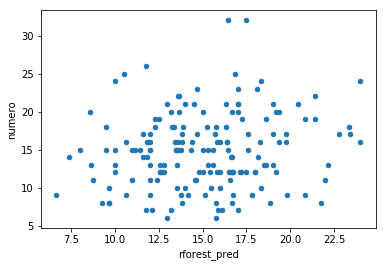

In [25]:
data_filtrada.plot(kind="scatter", y="numero", x="rforest_pred")

In [26]:
data_filtrada["rforest_error2"] = (data_filtrada["rforest_pred"]-data_filtrada["numero"])**2
error=(sum(data_filtrada["rforest_error2"])/len(data_filtrada))*100
str(round(error,2))+"%"

'3133.21%'

In [27]:
score=forest.oob_score_*100
str(round(score,2))+"%"

'-31.03%'

In [28]:
forest.n_features_

2

In [29]:
forest.n_outputs_

1

In [30]:
forest.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1319841726, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=80076151, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=791049267, splitter='best'),
 DecisionTreeRegressor

In [31]:
forest.feature_importances_

array([0.63945847, 0.36054153])

In [54]:
np.round(forest.predict([[2018,7]]))

array([21.])